In [1]:
using Catlab

# Specify a category representing discrete dynamical system (DDS) as freely presented by the following schema

In [3]:
@present SchDDS(FreeSchema) begin
    State::Ob
    next::Hom(State,State)
end;

## Let's now visually display the presentation of this category

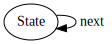

In [4]:
to_graphviz(SchDDS)

In [5]:
generators(SchDDS)

2-element Vector{Any}:
 State
 next: State → State

In [6]:
generator_index(SchDDS, :State)

1

In [7]:
stateOb = generators(SchDDS)[1]

State

# An easier way to refer to the objects and Homs is as follows

In [8]:
f = SchDDS[:next]

next: State → State

In [9]:
dom(f)

State

In [10]:
codom(f)

State

# The category is freely generated from the presentation above; thus, subject to the relations given (here, none) and the category axioms, composing one morphism with another will yield a distinct morphism

In [11]:
compose(f,f)

next⋅next: State → State

In [13]:
compose(id(stateOb), f)

next: State → State

# Now we introduce a category for a dynamical system limited to periodic orbits of length 2

In [15]:
@present SchDDSPeriod2(FreeSchema) begin
    State::Ob
    next::Hom(State,State)
    # if we take two transitions, we get back to our original state
    compose(next,next) == id(State)
end;

In [16]:
f2 = SchDDSPeriod2[:next]

next: State → State

In [17]:
equations(SchDDSPeriod2)

1-element Vector{Pair}:
 compose(next,next) => id(State)

In [58]:
## NB: The equation above is recognized, but is not currently enforced -- the user must honour it in their implementation (e.g., C-Sets).
## Future evolution of Catlab may use e-graphs to enforce such equations

In [19]:
compose(f2, f2) == id(SchDDSPeriod2[:State])

false

## Let's now visually display the presentation

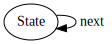

In [20]:
to_graphviz(SchDDSPeriod2)

# We now introduce a schema for reflexive graphs

In [22]:
@present SchReflGraph(FreeSchema) begin
    (E,V)::Ob
    # The following two morphisms pick out the source and target vertices of an edge, respectively
    src::Hom(E,V)
    tgt::Hom(E,V)
    # In a reflexive graph, each vertex is associated with a self-edge. For a vertex, the "rfl" morphism picks out its self-edge.
    rfl::Hom(V,E)
    # The for any vertex, v, reflexive edge for v must go from v to v
    compose(rfl,src) == id(V)
    compose(rfl,tgt) == id(V)
end;

In [23]:
generators(SchReflGraph)

5-element Vector{Any}:
 E
 V
 src: E → V
 tgt: E → V
 rfl: V → E

## Let's now visually display the presentation of this category

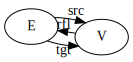

In [71]:
to_graphviz(SchReflGraph)